# Computer Practical 2: Gaussian Processes 

Building from the last practical, we will implement Gaussian processes. We will do so only in one-dimension.

We require the following libraries (use `install.packages()` if the packages are not available):

In [97]:
library(reshape2)
library(ggplot2)

options(repr.plot.width = 4, repr.plot.height = 3) 


## `R` Tutorial

If you are comfortable with the basics of `R`, feel free to skip this section.

### Types in `R`

A variable can store different types of values such as numbers, characters etc. These different types of data that we can use in our code are called data types. For example:

In [51]:
number = 23L
class(number)

[1] "integer"

Here, `number` is of `integer` type. To specify an integer an `L` term can be placed at the end of the number.

In [50]:
number = 23
class(number)

[1] "numeric"

Here, `number` is of `numeric` type. Note how the lack of an `L` meant `R` interpreted this as a `numeric`.

There are $6$ basic data types in `R`:

1. Logical: `TRUE` and `FALSE` values
2. Numeric: All real valued numbers with or without decimals e.g.`23.3`, `10`, `-2`.
3. Integer: All integer numbers e.g. `10L`, `-2L`.
4. Complex: All complex numbers e.g. `3+2i`, `1 + 1i`.
5. Character: All strings of letters e.g. `"abc"`, `"Apple"`
6. Raw: Specifies values as raw bytes e.g. `charToRaw("Tutorial")`.

The main ones you will use are Logical, Numeric and maybe Character.

In [27]:
boolean = TRUE
print(class(boolean))

number = 1.1
print(class(number))

string = "Hello"
print(class(string))

[1] "logical"
[1] "numeric"
[1] "character"


### Data Structures in `R`

Given the basic types of `R`, we can combine values into *data structures*. 

For example, we can combine numeric data into a vector using `c()` (which is short for *concatenation*):

In [28]:
vector = c(1,2,3)

We can also combine character or logical data into a vector:

In [29]:
logical_vector = c(TRUE,FALSE,TRUE)
character_vector = c('a','b','c')

In [31]:
list('a'=2, 'b'=c(1,2,3))

$a
[1] 2

$b
[1] 1 2 3

The main data structures in `R` are:

1. Vectors: E.g. `c(1,2,3)`, `1:4`
2. Matrices: Two-dimensional vectors. E.g. `matrix(0, nrow=3, ncol=2)`, `rbind(c(1,2), c(3,4))` or `cbind(c(1,2), c(3,4))`
3. Arrays: Higher dimensional matrices. E.g. `array(c(1,2,3), dim=c(3,2))`
4. Lists: E.g. `list("Red", "Green", c(21,32,11), TRUE, 51.23, 119.1)`, `list('a'=2, 'b'=c(1,2,3))`.
5. Data Frames: E.g. `data.frame(c(1,2,3))`.

We will probably not use arrays at all.  

Let's go through each data structure:

#### Vectors

Vectors in `R` are a one-dimensional collection of elements of the same data type. The data types can be logical, integer, double, character, complex or raw.

Vectors are usually created using `c()` which is short for concatenation. But there are other shorthands.

In [42]:
test_vector = c(1, 'a')
test_vector

[1] "1" "a"

Note how `R` has forced `test_vector` to have both elements to be of type character. This is because vectors can only have one data type.

The numeric `1` was changed to a character `"1"`. This is an example of *type casting*, where the type of the variable is changed from one type to another.

There are other shorthands for creating vectors that will be useful:

In [43]:
vec = 1:10
print(vec)

vec2 = seq(0, 10, 1)
print(vec2)

vec3 = seq(0, 10, length.out = 11)
print(vec3)

 [1]  1  2  3  4  5  6  7  8  9 10
 [1]  0  1  2  3  4  5  6  7  8  9 10
 [1]  0  1  2  3  4  5  6  7  8  9 10


#### Matrices

Matrices in `R` are really just two-dimensional vectors. Matrices are data all of the same type arranged into a rectangular grid. Like vectors, the data types can be logical, integer, double, character, complex or raw.

The basic syntax for creating matrices is

`matrix(data, nrow, ncol, byrow, dimnames)`

1. `data` is the input vector which becomes the data elements of the matrix.

2. `nrow` is the number of rows to be created.

3. `ncol` is the number of columns to be created.

4. `byrow` is a logical clue. If `TRUE` then the input vector elements are arranged by row.

5. `dimname` is the names assigned to the rows and columns.

Unlike vectors, the rows and columns of a matrix can be given names. This wont be that useful.

In [46]:
matrix(c(3:14), nrow = 4, byrow = TRUE)

3,4,5
6,7,8
9,10,11
12,13,14


In [47]:
rownames = c("row1", "row2", "row3", "row4")
colnames = c("col1", "col2", "col3")
matrix(c(3:14), nrow = 4, byrow = TRUE, dimnames = list(rownames, colnames))

,col1,col2,col3
row1,3,4,5
row2,6,7,8
row3,9,10,11
row4,12,13,14


You can also create matrices by using `rbind` or `cbind`. 

In [48]:
vec1 = c(1,2,3)
vec2 = c(4,5,6)

print(rbind(vec1,vec2))
print(cbind(vec1,vec2))

     [,1] [,2] [,3]
vec1    1    2    3
vec2    4    5    6
     vec1 vec2
[1,]    1    4
[2,]    2    5
[3,]    3    6


You can add and multiply matrices:

In [52]:
A = matrix(c(1,2,3,4), nrow=2)
B = matrix(c(4,3,2,1), nrow=2)

print(A)
print(B)

     [,1] [,2]
[1,]    1    3
[2,]    2    4
     [,1] [,2]
[1,]    4    2
[2,]    3    1


Addition `+` is performed component-wise:

In [53]:
A + B

5,5
5,5


Multiplication `*` is performed component-wise (this is sometimes called the Hadamard product):

In [54]:
A * B

4,6
6,4


To multiply matrices properly, we must use the operation `%*%`:

In [55]:
A %*% B

13,5
20,8


In order to access elements of a matrix, we use:

In [59]:
A[1:2,1]

[1] 1 2

#### Lists

Lists are special since they can contain different data types. You can also specify the *names* of elements of the list.

The basic syntax is:

In [57]:
my_list = list('a', 2, c(1,2,3))
my_list

[[1]]
[1] "a"

[[2]]
[1] 2

[[3]]
[1] 1 2 3

In order to access elements of the list:

In [63]:
print(my_list[1])

[[1]]
[1] "a"



If we want to name elements in the list, we use the syntax:

In [66]:
my_list2 = list('a' = 2, 'element2' = 4, 'string' = "abc", 2)

The names in `my_list2` are `a`, `element2` and `string`. There corresponding values are `2`, `4` and `"abc"` respectively.

If we have named elements, we can access them in a special way using the `$` symbol:

In [69]:
print(my_list2$a)
print(my_list2$element2)
print(my_list2$string)

[1] 2
[1] 4
[1] "abc"


We can also still access elements in the usual way:

In [70]:
print(my_list2[1])
print(my_list2[2])
print(my_list2[4])

$a
[1] 2

$element2
[1] 4

[[1]]
[1] 2



#### Data Frames

A data frame is really just a matrix which is allowed to have different data types as elements. 

A data frame is a table or a two-dimensional array-like structure in which each column contains values of one variable and each row contains one set of values from each column.

Like a matrix, you can provide names for the rows and columns.

In [87]:
my_dataframe = data.frame(
    numbers = 1:5,
    names = c("Rick","Dan","Michelle","Ryan","Gary"),
    salary = c(623.3,515.2,611.0,729.0,843.25)
)

my_dataframe

numbers,names,salary
<int>,<chr>,<dbl>
1,Rick,623.30
2,Dan,515.20
3,Michelle,611.00
4,Ryan,729.00
5,Gary,843.25


Note how the data frame contains different types.

We can access elements of a data frame using standard techniques:

In [91]:
my_dataframe[2] # returns second column of data frame

names
<chr>
Rick
Dan
Michelle
Ryan
Gary


In [96]:
my_dataframe[3,2] # returns third row and second column element

[1] "Michelle"

### Functions in `R`

To define an `R` function we use the keyword `function` followed by defining the variables (e.g. `function(x)`) used in the function and then we enclose the logic of the function in curly braces `{}`. We use the `return` function if we want to return a value from the function.

For example:

In [77]:
func = function(x) {
    return(x ** 2)
}

func(3)

[1] 9

### Loops in `R`

There are two types of loops in ``R``:

1. For loops: loops through each element of a vector or list
2. While loops: loops until condition becomes ``FALSE``

The syntax is as follows:


In [78]:
fruits = list("apple", "banana", "cherry") 

for (x in fruits) {
  print(x)
}

[1] "apple"
[1] "banana"
[1] "cherry"


While loops are potentially dangerous because they may not terminate e.g. ``while(TRUE)`` would loop for ever.

In [79]:
i = 1
while (i < 6) {
    print(i)
    i = i+1
}

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5


You can nest for-loops:

In [81]:
for (i in 1:3) {
    for (j in 1:3) {
        print(i + j)
    }
}

[1] 2
[1] 3
[1] 4
[1] 3
[1] 4
[1] 5
[1] 4
[1] 5
[1] 6


### Distributions in `R`

Let $X$ be a random variable which has some distribution. Standard things you would like to do with $X$:
1. Sample from $X$
2. Evaluate the pdf (or pmf) if $X$ is continuous (or discrete)
3. Evaluate the cdf of $X$

`R` has a standard convention of naming these things:

1. Sampling: `rdistribution`, e.g. Normal `rnorm`, Poisson `rpois`, Gamma `rgamma`.
2. pdf or pmf: `ddistribution`, e.g. Normal `dnorm`, Poisson `dpois`, Gamma `dgamma`.
3. cdf: `pdistribution`, e.g. Normal `pnorm`, Poisson `ppois`, Gamma `pgamma`.

Here, `distribution` is the shortened name of some distribution.

For example:

In [74]:
gamma_sample = rgamma(100, 1, 1)

Here, I have generated $100$ samples from a Gamma distribution with shape parameter $1$ and rate parameter $1$. 

It is important to check how a distribution is parameterised in `R`. For example, the normal distribution is parameterised by the standard deviation, not the variance:

In [76]:
normal_sample = rnorm(100, mean = 0, sd = 2)

### Packages in `R`

An `R` package is a collection of prewritten `R` code.

All `R` packages are available online in `CRAN`. This is the central repository of all `R` packages. 

In order to install an `R` package, you use the syntax:

`install.packages("package_name")`

where `package_name` is the name of the package. We use the packages `ggplot2` and `reshape2`.

In order to load a package, so we can the prewritten `R` code, we use the syntax:

`library(package_name)`

where `package_name` is the name of the package.

### General advice for coding

Whenever you are unsure of anything, use Google.

For example, if I want a length `N` vector of zeros, but I am unsure how to create it, I could Google "how to create vector of zeros in r".

The top result is [Stack Overflow](https://stackoverflow.com/questions/33119406/how-to-declare-a-vector-of-zeros-in-r), for which the top answer gives all the different ways of doing this:

1. `integer(N)`
2. `numeric(N)`
3. `rep(0, N)`
4. `rep(0L, N)`

In general, if you are unsure of anything, someone else has probably asked a question on Stack Overflow that will solve your issue.

## Gaussian Processes

A Gaussian Process $f$ is written as

$$ f\sim\mathcal{GP}(m,k). $$

Here, $m$ is the *mean function* and $k$ is the *kernel* or *covariance function*.

By implementing "Gaussian Processes", I mean completing the following tasks:

1. Implement a mean function.
2. Implement a kernel function.
3. Sample from a prior GP
4. Sample from a posterior GP

## Task 1: Create a Mean Function

The first task is to implement an `R` function which computes a mean function. 

You can choose any mean function you would like. 

The simplest one to implement is just the zero-function:

$$ m(x) = 0.$$

Ideally, you would like to implement this in a *vectorisable* way. This means that given a vector of inputs, the `R` function should be able to evaluate each component of the vector and return a new vector. 

If you decide to implement the zero-function in a vectorisable way, the following code may be helpful:

1. `numeric(N)` - creates a vector of zeros of length `N`
2. `length()` - computes the length of a vector (e.g. `length(c(1,2,3)) = 3`)

In [98]:
# the zero mean function

my_mean = function(x) {
    return(numeric(length(x)))
}

To check it is vectorisable, try to run the following code:

In [99]:
xs = seq(0, 10, length.out = 5)
my_mean(xs) # should output a length 5 vector

[1] 0 0 0 0 0

## Task 2: Create a Covariance Function

The second task is to implement an `R` function which computes a covariance function. 

There are many different covariance functions. 

Here are a few covariance functions which you could try to implement:

1. Brownian Motion: $$k(x,y) = \min(x,y)$$
2. Exponential Kernel: $$ k(x,y) = \exp(-|x-y|) $$
3. Linear Kernel: $$ k(x,y) = 1 + xy$$
4. Quadratic Kernel: $$ k(x,y) = 1 + xy + x^2y^2$$
5. Squared Exponential Kernel: $$ k(x,y) = \exp(-(x-y)^2)  $$

*(Note: If you plan to implement the Brownian Motion kernel use* `pmin` *instead of* `min`*)*

In [100]:
# Brownian motion kernel

my_kernel = function(x, y) {
    return(pmin(x,y))
}

## Task 3: Sampling From Prior GP

The third task is to use the previous parts to sample from the prior Gaussian Process at some $x$ locations.

This can be achieved in the following steps:

1. Define a vector $\underline{x} = (x_1,\ldots,x_n)$ of $x$ locations. For example: `xs = seq(0,1,length.out=100)`. Using our math notation, this is the *design matrix* $\mathrm{X}$. Since we are in one-dimension, $\mathrm{X}$ is really a vector.
2. The next step is compute the distribution of $\underline{f}_{\mathrm{X}}$. This is a MVN distribution with mean vector $$\underline{m}_{\mathrm{X}} = (m(x_1),\ldots, m(x_n))^\top$$ and covariance matrix $$[\mathrm{K}_{\mathrm{X}\mathrm{X}}]_{ij} = k(x_i, x_j). $$ 
3. We can compute the mean vector by using our `my_mean` function from Task 1.
4. We can compute covariance matrix by using our `my_kernel` function from Task 2.
5. Given this mean vector and covariance matrix, we can sample from the prior Gaussian Process using the `R` function that samples from the multivariate normal distribution that we wrote in Practical 1 (`rmvn`).

Depending on which kernel function you implemented, the `rmvn` function which used the Cholesky decomposition may break. The following alternative sampling function should always work (it uses a different method of computing the matrix $\mathrm{A}$ from $\mathrm{K} = \mathrm{A}\mathrm{A}^\top$):

In [101]:
rmvn_svd <- function(N, mean, covariance) {
    # samples from the MVN using singular value decomposition
    # this is more computationally stable,
    # but it is slower than cholesky decomposition

    n <- length(mean) # dimension of random vector

    standard_normal_sample <- rnorm(n * N)
    standard_mvn_sample <- matrix(standard_normal_sample, nrow = N)

    svd_out <- svd(covariance)
    square_root =  svd_out$v %*% sqrt(diag(svd_out$d))
    output <- square_root %*% t(standard_mvn_sample) + mean

    return(t(output))
}

The following code may be useful (depending on your approach):

1. `matrix(0, nrow = N, ncol = N)` - creates an empty matrix with `N` rows and `N` columns.
2. `outer(xs, ys, function)` - outputs the matrix with ($i,j$)th element `function(xs[i], ys[j])`.

*(Hint: a nested for-loop may be helpful to compute the covariance matrix)*

In [107]:
N = 201 # number of x elements we will sample at

xs = seq(0, 5, length.out = N)


mean_vec = my_mean(xs)

# using nested for-loop:
cov_mat = matrix(0, N, N)

for (i in 1:N) {
    for (j in 1:N) {
        cov_mat[i,j] = my_kernel(xs[i], xs[j])
    }
}

# using outer

cov_mat = outer(xs, xs, my_kernel)

If you have defined everything correctly, the following plotting code should work. The plot you can see here is Brownian motion with $m(x) = 0$ and $k(x,y) = \min(x,y)$.

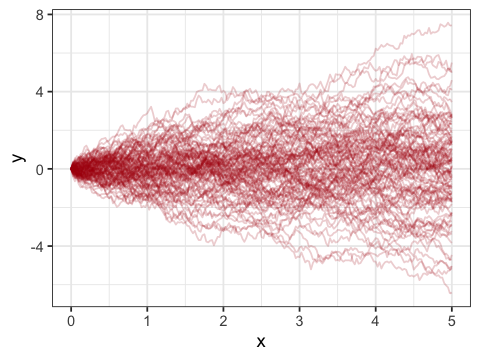

In [108]:
gp_sample = rmvn_svd(100, mean_vec, cov_mat) # Gaussian Process Sample

gp_samples_df = melt(data.frame(xs, t(gp_sample)), id = "xs") # turn into a dataframe

gp_sample_plot = ggplot(gp_samples_df) +
                geom_line(aes(x = xs, y = value, group = variable), color = "#ac100b", alpha = 0.2, show.legend = FALSE) +
                theme_bw() + labs(x = "x", y = "y")

gp_sample_plot

## Task 4: Posterior GP

The fourth task is to compute the posterior mean vector and posterior covariance matrix of a Gaussian Process.

We will use the `condmvn` function from last week:

In [106]:
condmvn <- function(a, mu1, mu2, K11, K12, K22) {
    # computes conditional of MVN

    inv_K22 <- solve(K22)

    tilde_mu <- mu1 + K12 %*% inv_K22 %*% (a - mu2)
    tilde_K <- K11 - K12 %*% inv_K22 %*% t(K12)

    output <- list("cond_mean" = as.vector(tilde_mu), "cond_covariance" = tilde_K)

    return(output)
}

Let 
$$f\sim\mathcal{GP}(m,k).$$
Given data $\underline{f}_{\mathrm{X}} = \underline{a}$, the posterior process $f\,|\, \underline{f}_{\mathrm{X}} = \underline{a}$ is again a Gaussian Process 
$$
    f\,|\, \underline{f}_{\mathrm{X}} = \underline{a}\sim\mathcal{GP}(\tilde{m}, \tilde{k}).
$$

Let $\mathrm{X}^* = (x^*_1,\ldots,x_m^*)$. We want to sample from the distribution of

$$ \underline{f}_{\mathrm{X}^*} | \underline{f}_{\mathrm{X}} = \underline{a} $$

Steps:


1. Define $\mathrm{X}^*$, $\mathrm{X}$  and $\underline{a}$, 
2. Compute the mean and covariance matrix of $\underline{f}_{\mathrm{X}^*}$
3. Compute the mean and covariance matrix of $\underline{f}_{\mathrm{X}}$
4. Compute the cross-covariance matrix between $\underline{f}_{\mathrm{X}^*}$ and $\underline{f}_{\mathrm{X}}$
5. Using these values, compute the posterior mean vector and covariance matrix of $\underline{f}_{\mathrm{X}^*} | \underline{f}_{\mathrm{X}} = \underline{a} $. This can be computed using `condmvn` from last week.

In [133]:
N = 201 # number of x locations we sample posterior at

a = c(1,-1,1,-1) # y values we are conditioning on
X = c(1, 2, 3, 4) # x locations we are conditioning on
X_star = seq(0, 5, length.out=N) # x values we are sampling the posterior at

mean_X_star = my_mean(X_star)
mean_X = my_mean(X)

# using nested for-loop


cov_mat_X_star = matrix(0, N, N)

for (i in 1:N) {
    for (j in 1:N) {
        cov_mat_X_star[i,j] = my_kernel(X_star[i], X_star[j])
    }
}

cov_mat_X = matrix(0, length(X), length(X))

for (i in 1:length(X)) {
    for (j in 1:length(X)) {
        cov_mat_X[i,j] = my_kernel(X[i], X[j])
    }
}



cross_cov_mat = matrix(0, N, length(X))

for (i in 1:N) {
    for (j in 1:length(X)) {
        cross_cov_mat[i,j] = my_kernel(X_star[i], X[j])
    }
}

# using outer

cov_mat_X = outer(X, X, my_kernel)
cov_mat_X_star = outer(X_star, X_star, my_kernel)

cross_cov_mat = outer(X_star, X, my_kernel)

In [139]:
output = condmvn(a, mean_X_star, mean_X, cov_mat_X_star, cross_cov_mat, cov_mat_X)

posterior_mean = output$cond_mean
posterior_covariance = output$cond_covariance

If your code is working, the following code should work. Here, we used the Brownian motion with $\mathrm{X} = (1,2,3,4)^\top$ and $\underline{a} = (1,-1,1,-1)^\top$.

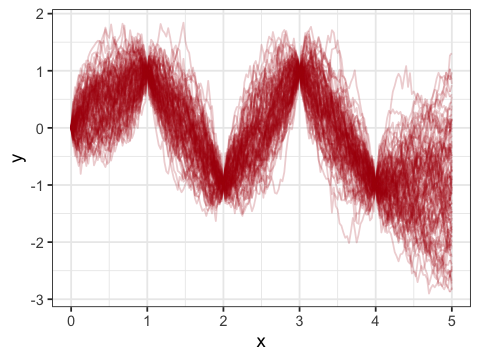

In [140]:
gp_sample = rmvn_svd(100, posterior_mean, posterior_covariance) # Gaussian Process Sample

gp_samples_df = melt(data.frame(xs, t(gp_sample)), id = "xs") # turn into a dataframe

gp_sample_plot = ggplot(gp_samples_df) +
                geom_line(aes(x = xs, y = value, group = variable), color = "#ac100b", alpha = 0.2, show.legend = FALSE) +
                theme_bw() + labs(x = "x", y = "y") 

gp_sample_plot